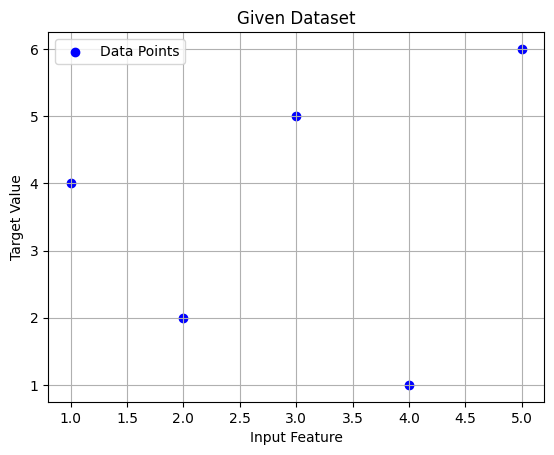

 Given Data:
Input Features = [1 2 3 4 5]
Target Values = [4 2 5 1 6]

Mean of Features (x̄) = 3.000
Mean of Target (ȳ) = 3.600
Feature Spread (Σ(xi - x̄)²) = 10.000

 Linear Regression (OLS):
slope_ols = 0.3000
intercept_ols = 2.7000


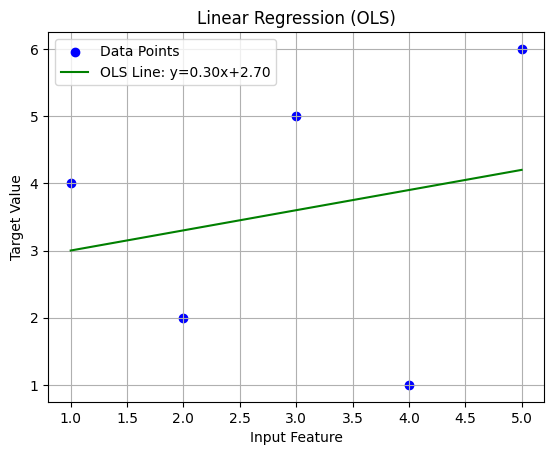

 Ridge Regression:
alpha (λ) = 0.5
slope_ridge = 0.2857
intercept_ridge = 2.7429


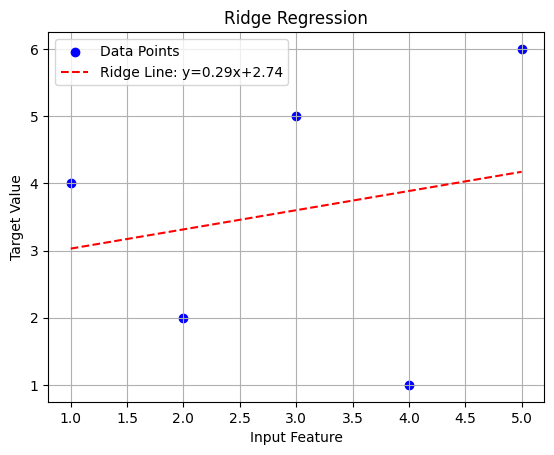

 Lasso Regression:
alpha (λ) = 0.5
spread_x (s) = 10.000
sign(slope_ols) = 1.0
slope_lasso = 0.2500
intercept_lasso = 2.8500


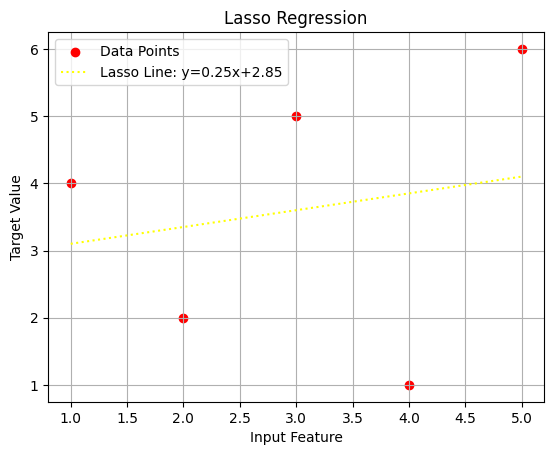


 Mean Squared Error (MSE) Comparison:
  OLS   : 3.2600
  Ridge : 3.2604
  Lasso : 3.2650

 Model with lowest MSE: OLS


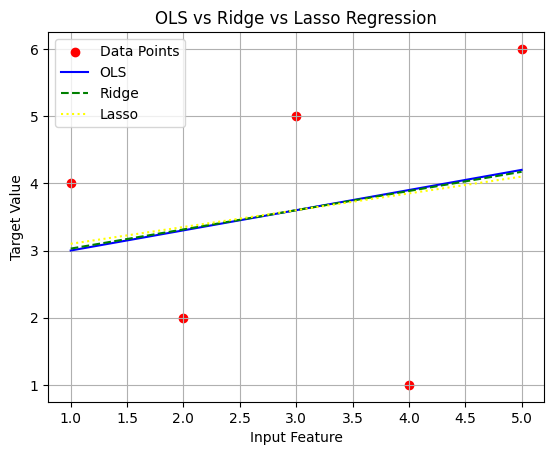

In [3]:
import numpy as np
import matplotlib.pyplot as plt

input_features = np.array([1, 2, 3, 4, 5])
target_values = np.array([4, 2, 5, 1, 6])
alpha = 0.5

plt.scatter(input_features, target_values, color='blue', label='Data Points')
plt.title("Given Dataset")
plt.xlabel("Input Feature")
plt.ylabel("Target Value")
plt.legend()
plt.grid(True)
plt.show()

print(" Given Data:")
print("Input Features =", input_features)
print("Target Values =", target_values)
print()

mean_x = np.mean(input_features)
mean_y = np.mean(target_values)

covariance_term = np.sum((input_features - mean_x) * (target_values - mean_y))
variance_term = np.sum((input_features - mean_x) ** 2)

spread_x = np.sum((input_features - mean_x) ** 2)

print(f"Mean of Features (x̄) = {mean_x:.3f}")
print(f"Mean of Target (ȳ) = {mean_y:.3f}")
print(f"Feature Spread (Σ(xi - x̄)²) = {spread_x:.3f}")
print()

slope_ols = covariance_term / variance_term
intercept_ols = mean_y - slope_ols * mean_x
predictions_ols = slope_ols * input_features + intercept_ols

print(" Linear Regression (OLS):")
print(f"slope_ols = {slope_ols:.4f}")
print(f"intercept_ols = {intercept_ols:.4f}")

plt.scatter(input_features, target_values, color='blue', label='Data Points')
plt.plot(input_features, predictions_ols, color='green', label=f'OLS Line: y={slope_ols:.2f}x+{intercept_ols:.2f}')
plt.title("Linear Regression (OLS)")
plt.xlabel("Input Feature")
plt.ylabel("Target Value")
plt.legend()
plt.grid(True)
plt.show()

slope_ridge = covariance_term / (variance_term + alpha)
intercept_ridge = mean_y - slope_ridge * mean_x
predictions_ridge = slope_ridge * input_features + intercept_ridge

print(" Ridge Regression:")
print(f"alpha (λ) = {alpha}")
print(f"slope_ridge = {slope_ridge:.4f}")
print(f"intercept_ridge = {intercept_ridge:.4f}")

plt.scatter(input_features, target_values, color='blue', label='Data Points')
plt.plot(input_features, predictions_ridge, color='red', linestyle='--', label=f'Ridge Line: y={slope_ridge:.2f}x+{intercept_ridge:.2f}')
plt.title("Ridge Regression")
plt.xlabel("Input Feature")
plt.ylabel("Target Value")
plt.legend()
plt.grid(True)
plt.show()

slope_sign = np.sign(slope_ols)
slope_lasso = slope_sign * max(0, abs(slope_ols) - alpha / spread_x)
intercept_lasso = mean_y - slope_lasso * mean_x
predictions_lasso = slope_lasso * input_features + intercept_lasso

print(" Lasso Regression:")
print(f"alpha (λ) = {alpha}")
print(f"spread_x (s) = {spread_x:.3f}")
print(f"sign(slope_ols) = {slope_sign}")
print(f"slope_lasso = {slope_lasso:.4f}")
print(f"intercept_lasso = {intercept_lasso:.4f}")

plt.scatter(input_features, target_values, color='red', label='Data Points')
plt.plot(input_features, predictions_lasso, color='yellow', linestyle=':', label=f'Lasso Line: y={slope_lasso:.2f}x+{intercept_lasso:.2f}')
plt.title("Lasso Regression")
plt.xlabel("Input Feature")
plt.ylabel("Target Value")
plt.legend()
plt.grid(True)
plt.show()

error_ols = np.mean((target_values - predictions_ols) ** 2)
error_ridge = np.mean((target_values - predictions_ridge) ** 2)
error_lasso = np.mean((target_values - predictions_lasso) ** 2)

print("\n Mean Squared Error (MSE) Comparison:")
print(f"  OLS   : {error_ols:.4f}")
print(f"  Ridge : {error_ridge:.4f}")
print(f"  Lasso : {error_lasso:.4f}")

error_comparison = {
    "OLS": error_ols,
    "Ridge": error_ridge,
    "Lasso": error_lasso
}
lowest_error_model = min(error_comparison, key=error_comparison.get)
print(f"\n Model with lowest MSE: {lowest_error_model}")

plt.scatter(input_features, target_values, color='red', label='Data Points')
plt.plot(input_features, predictions_ols, color='blue', label='OLS')
plt.plot(input_features, predictions_ridge, color='green', linestyle='--', label='Ridge')
plt.plot(input_features, predictions_lasso, color='yellow', linestyle=':', label='Lasso')
plt.title("OLS vs Ridge vs Lasso Regression")
plt.xlabel("Input Feature")
plt.ylabel("Target Value")
plt.legend()
plt.grid(True)
plt.show()

In [4]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

housing = fetch_california_housing()
X, y = housing.data, housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_ols = LinearRegression()
model_ridge = Ridge(alpha=1.0)
model_lasso = Lasso(alpha=0.1)

model_ols.fit(X_train_scaled, y_train)
model_ridge.fit(X_train_scaled, y_train)
model_lasso.fit(X_train_scaled, y_train)

y_pred_ols = model_ols.predict(X_test_scaled)
y_pred_ridge = model_ridge.predict(X_test_scaled)
y_pred_lasso = model_lasso.predict(X_test_scaled)

mse_ols = mean_squared_error(y_test, y_pred_ols)
r2_ols = r2_score(y_test, y_pred_ols)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("--- Model Performance Comparison (California Housing) ---")

print(f"\nLinear Regression (OLS):")
print(f"  Mean Squared Error (MSE): {mse_ols:.4f}")
print(f"  R-squared (R²):           {r2_ols:.4f}")

print(f"\nRidge Regression (alpha=1.0):")
print(f"  Mean Squared Error (MSE): {mse_ridge:.4f}")
print(f"  R-squared (R²):           {r2_ridge:.4f}")

print(f"\nLasso Regression (alpha=0.1):")
print(f"  Mean Squared Error (MSE): {mse_lasso:.4f}")
print(f"  R-squared (R²):           {r2_lasso:.4f}")

print("\n--- Coefficient Analysis ---")
total_features = X.shape[1]
print(f"Total features: {total_features}")
print(f"OLS non-zero coefficients:   {np.sum(model_ols.coef_ != 0)}")
print(f"Ridge non-zero coefficients: {np.sum(model_ridge.coef_ != 0)}")
print(f"Lasso non-zero coefficients: {np.sum(model_lasso.coef_ != 0)}")

--- Model Performance Comparison (California Housing) ---

Linear Regression (OLS):
  Mean Squared Error (MSE): 0.5559
  R-squared (R²):           0.5758

Ridge Regression (alpha=1.0):
  Mean Squared Error (MSE): 0.5559
  R-squared (R²):           0.5758

Lasso Regression (alpha=0.1):
  Mean Squared Error (MSE): 0.6796
  R-squared (R²):           0.4814

--- Coefficient Analysis ---
Total features: 8
OLS non-zero coefficients:   8
Ridge non-zero coefficients: 8
Lasso non-zero coefficients: 3
